In [11]:
import pandas as pd
import datetime as dt


# The first Jupyter notebook was only working with data from 1976-2015. This notebook extends the analysis to 2022. 
## Preparing dataframes for analysis

In [27]:
df = pd.read_csv("crossword_year_2022.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)
df

,crossword_date,answers,clues,crossword_year
0,2022-01-01,WINNER,First person?,2022
1,2022-01-01,PLANBS,Backups,2022
2,2022-01-01,WHOOPI,First name in daytime talk,2022
3,2022-01-01,MAOSUIT,Red Guard's attire,2022
4,2022-01-01,IAMBIC,"Like ""To be or not to be""",2022
...,...,...,...,...
15765,2022-07-08,STOAT,Source of some fur,2022
15766,2022-07-08,KONA,Hawaii's ___ Coast,2022
15767,2022-07-08,FELL,Cut down,2022
15768,2022-07-08,ERRS,Isn't right,2022


In [28]:
df2 = pd.read_csv("slangtill2015.csv")
df2.drop('Unnamed: 0', inplace = True, axis =1)
df3 = df2.append(df, ignore_index=True)
df3

C:\Users\aisvarya\AppData\Local\Temp\ipykernel_30396\1600407043.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df2.append(df, ignore_index=True)


,crossword_date,answers,clues,crossword_year
0,1976-01-05,AJAX,Greek hero,1976
1,1976-01-05,WHOOP,Loud cry,1976
2,1976-01-05,CRAB,Peevish person,1976
3,1976-01-05,BALI,Romantic isle,1976
4,1976-01-05,HEAVE,Lift,1976
...,...,...,...,...
240765,2022-07-08,STOAT,Source of some fur,2022
240766,2022-07-08,KONA,Hawaii's ___ Coast,2022
240767,2022-07-08,FELL,Cut down,2022
240768,2022-07-08,ERRS,Isn't right,2022


### df_answers_clues is a dataframe with XW puzzle data from 1976 - 2022 (June)
To reduce the load/scrape time, I only included three columns: answers, clues and crossword date. But several other attributes are available for analysis

In [33]:
df_2018 = pd.read_csv("crossword_year_2015_2021.csv")
df_2018.drop('Unnamed: 0', inplace=True, axis=1)
df_answers_clues = df_2018.append(df3, ignore_index=True)
df_answers_clues = df_answers_clues.sort_values('crossword_year').drop_duplicates()
df_answers_clues['day_of_week'] = pd.to_datetime(df_answers_clues['crossword_date'], errors='coerce').dt.day_name()
df_answers_clues.crossword_year.value_counts()

C:\Users\aisvarya\AppData\Local\Temp\ipykernel_30396\3222802290.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_answers_clues = df_2018.append(df3, ignore_index=True)


1976    31434
1977    31404
1979    31356
1980    31332
1981    31260
1982    31216
2020    30423
2021    30393
2017    30369
2016    30361
2015    30335
2019    30279
2018    30203
1978    23900
2022    15770
1983    13098
Name: crossword_year, dtype: int64

### Slang is a dataframe that I created with most of the words NYT editors considered slang. 

Modifiers in the clue that I used to collect these words are:
colloquially, modern lingo, slang, informally, slangily, in texts (expanded the list to include texts)

In [5]:
slang = df_answers_clues[df_answers_clues['clues'].str.contains('in texts', regex=False) |df_answers_clues['clues'].str.contains('colloquially', regex=False) |df_answers_clues['clues'].str.contains('modern lingo', regex=False) | df_answers_clues['clues'].str.contains('slang', regex=False) | df_answers_clues['clues'].str.contains('informally', regex=False) | df_answers_clues['clues'].str.contains('slangily', regex=False)]
slang

,crossword_date,answers,clues,crossword_year,day_of_week
252416,1977-04-10,LEGGO,"68 Across, slangily",1977,Sunday
284758,1978-04-21,SCHMO,"Sap, in slanguage",1978,Friday
286369,1978-05-09,OKAY,"Concurrence, colloquially",1978,Tuesday
281906,1978-03-19,LIBBER,"Feminist, colloquially",1978,Sunday
316788,1979-07-26,BLUES,"Navy uniform, informally",1979,Thursday
...,...,...,...,...,...
442445,2022-03-02,DJS,"Club workers, informally",2022,Wednesday
442531,2022-03-03,SESH,"Meeting, informally",2022,Thursday
442345,2022-03-01,ALUMS,"Reunion attendees, informally",2022,Tuesday
442396,2022-03-01,BRB,"""Hang on a sec,"" in texts",2022,Tuesday


In [21]:
df_answers_clues[df_answers_clues['clues'].str.contains('Neologism', regex=False, na = False)]


,crossword_date,answers,clues,crossword_year
247904,1977-02-16,NEWWORD,Neologism,1977
59738,2016-12-19,SHOWMANCE,Neologism for an on-screen/off-screen relation...,2016
71037,2017-05-05,DELOVELY,Neologism coined by Cole Porter,2017
126365,2019-03-03,COINAGE,Neologism,2019
203480,2021-09-16,GOAT,"Neologism for the ""best ever""",2021


In [22]:
# should this be considered slang?
df_answers_clues[df_answers_clues['clues'].str.contains('Acronym', regex=False, na = False)]

,crossword_date,answers,clues,crossword_year
264639,1977-08-29,OPEC,Acronym for an oil group,1977
264034,1977-08-22,SALT,Acronym for U.S.-U.S.S.R. talks,1977
272515,1977-11-29,OPEC,Acronym for an oil-rich group,1977
274368,1977-12-21,OPEC,Acronym for a fuel cartel,1977
275960,1978-01-09,SCAP,Acronymic title once held by MacArthur,1978
285148,1978-04-25,OPEC,Acronym for a cartel in the news,1978
300446,1979-01-16,ANTA,Acronym on Broadway,1979
347605,1980-07-18,OPEC,Acronym in the news,1980
340247,1980-04-23,STOL,Acronym for a type of aircraft,1980
388332,1981-11-07,STOL,Acronym for a plane,1981


In [9]:
slang.to_csv('all_slang.csv')

In [35]:
slang_modern = df_answers_clues[df_answers_clues['clues'].str.contains('modern slang', regex=False) |df_answers_clues['clues'].str.contains('modern lingo', regex=False)]
slang_modern

,crossword_date,answers,clues,crossword_year,day_of_week
22321,2015-09-26,DOPENESS,"Excellence, in modern slang",2015,Saturday
22404,2015-09-27,CHEDDAR,"Money, in modern slang",2015,Sunday
15317,2015-07-04,HOLLA,"Say hi, in modern lingo",2015,Saturday
17619,2015-08-01,FRIENDZONE,"Relationship with unrequited love, in modern s...",2015,Saturday
27100,2015-11-22,MICDROP,"It might follow a showstopping performance, in...",2015,Sunday
...,...,...,...,...,...
439074,2022-01-21,TURNT,"Extremely excited, in modern lingo",2022,Friday
439325,2022-01-23,OBVI,"""Duh,"" in modern slang",2022,Sunday
438792,2022-01-17,NOOB,"Beginner, in modern lingo",2022,Monday
441340,2022-02-17,BAE,"Sweetheart, in modern lingo",2022,Thursday


In [36]:
# They're often more open to debuts on a harder day like Saturday, when people might be expected to have to know more obscure or generation-specific colloquialisms. But once the seal has been broken of a word/phrase debuting in the puzzle, it becomes easier for constructors to get it in again, until it becomes commonplace.

debut_slang = slang_modern.sort_values(by = 'crossword_date').drop_duplicates(subset=['answers'], keep='first')
debut_slang.day_of_week.value_counts()


Saturday     24
Sunday       19
Friday       15
Wednesday     9
Tuesday       8
Thursday      5
Monday        5
Name: day_of_week, dtype: int64

In [117]:
GridSize_df = pd.pivot_table(debut_slang,
                        values=['length'],
                        columns=['day_of_week'],
                        fill_value=0,
                        aggfunc='mean')
GridSize_df

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
length,5.606218,5.027778,5.773196,5.271642,5.209302,5.233161,4.875


<AxesSubplot:>

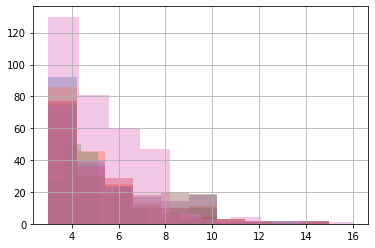

In [163]:
debut_slang[debut_slang['day_of_week'] == 'Monday']['length'].hist(alpha = 0.4)
debut_slang[debut_slang['day_of_week'] == 'Tuesday']['length'].hist(alpha = 0.4)
debut_slang[debut_slang['day_of_week'] == 'Wednesday']['length'].hist(alpha = 0.4)
debut_slang[debut_slang['day_of_week'] == 'Thursday']['length'].hist(alpha = 0.4)
debut_slang[debut_slang['day_of_week'] == 'Friday']['length'].hist(alpha = 0.4)
debut_slang[debut_slang['day_of_week'] == 'Saturday']['length'].hist(alpha = 0.4)
debut_slang[debut_slang['day_of_week'] == 'Sunday']['length'].hist(alpha = 0.4)


In [166]:
# |df_answers_clues['clues'].str.contains('colloquially', regex=False) |df_answers_clues['clues'].str.contains('modern lingo', regex=False) | df_answers_clues['clues'].str.contains('slang', regex=False) | df_answers_clues['clues'].str.contains('informally', regex=False) | df_answers_clues['clues'].str.contains('slangily', regex=False)
slang = df_answers_clues[df_answers_clues['clues'].str.contains('in texts', regex=False, na = False)]
slang.sort_values('crossword_year')

,crossword_date,answers,clues,crossword_year,day_of_week
20741,2015-09-06,ARE,Word often shortened to its middle letter in t...,2015,Sunday
16801,2015-07-22,IMO,"""I'd say,"" in texts",2015,Wednesday
23182,2015-10-06,OTOH,"Conversely, in texts",2015,Tuesday
2873,2015-02-04,IMHO,"""If you ask me,"" in textspeak",2015,Wednesday
3757,2015-02-15,TTYL,"""Bye for now,"" in textspeak",2015,Sunday
13562,2015-06-13,BRB,"""Putting the phone down for a sec,"" in textspeak",2015,Saturday
10759,2015-05-10,BRB,"""Just a minute,"" in texts",2015,Sunday
43499,2016-06-07,OTOH,"""Looking at it a different way,"" in texts",2016,Tuesday
31263,2016-01-11,IMO,"""As I see it,"" in textspeak",2016,Monday
36895,2016-03-20,IMO,"""Speaking personally ...,"" in texts",2016,Sunday


In [47]:
debut_slang.drop_duplicates(subset=['answers'], keep='first').sort_values('day_of_week')

,crossword_date,answers,clues,crossword_year,day_of_week
76840,2017-07-14,PIPES,"Singing ability, informally",2017,Friday
50141,2016-08-26,EXGOV,"Bill Clinton or George W. Bush, informally",2016,Friday
90247,2017-12-22,PONG,"Game with a 40-millimeter ball, informally",2017,Friday
109337,2018-08-10,BEN,"$100 bill, in slang",2018,Friday
14626,2015-06-26,MANSPLAIN,"Patronizingly point out, in modern lingo",2015,Friday
...,...,...,...,...,...
62199,2017-01-18,PALOOKAS,"Inept boxers, in slang",2017,Wednesday
127183,2019-03-13,THEY,"Place to go to swim, informally",2019,Wednesday
127197,2019-03-13,DATED,"Like the slang ""da bomb"" and ""tubular, man!""",2019,Wednesday
15666,2015-07-08,CLIP,"Good pace, informally",2015,Wednesday


<b> Tracking the lineage of a term's definition by looking at XWord Clues across time </b><br/>
Playground section:

In [18]:
frequent_answers = df_answers_clues[df_answers_clues['answers'] == 'GOAT']
frequent_answers

,crossword_date,answers,clues,crossword_year
224372,1976-05-22,GOAT,Billy or nanny,1976
246874,1977-02-05,GOAT,Markhor or ibex,1977
257368,1977-06-05,GOAT,Fall guy,1977
295659,1978-11-22,GOAT,Zodiac symbol,1978
325979,1979-11-10,GOAT,Blame-bearer,1979
332575,1980-01-26,GOAT,Patsy,1980
343136,1980-05-27,GOAT,Get one's ___ (rile),1980
339074,1980-04-09,GOAT,Player who loses the game,1980
371841,1981-04-28,GOAT,Butt or butter,1981
420191,1982-11-14,GOAT,Caprid,1982


<b> How modern is Shortz's modern slang? </b>
<br/> Looking at the answers (slang terms) that he described as modern

In [9]:
slang = df_answers_clues[df_answers_clues['clues'].str.contains('modern lingo', regex=False) | df_answers_clues['clues'].str.contains('modern slang', regex=False)]
slang.to_csv("modern_slang.csv")